# DSI7 - Group2
- Team Members: Rawan AlMalki, Rayan Raad, Ghalib Tawfiq

In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import math 
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn import metrics

%matplotlib inline

# Reading Data from CSV to DF
df_train_data_out = pd.read_csv("data/train.csv")
df_test_data = pd.read_csv("data/test.csv")

# Creating a submission template

In [2]:
submission = pd.DataFrame(df_test_data['Id'], columns={'Id'})

### First we want to inspect the data and see  what is the Percentage of None values of ever column
#### below is a function that takes a dataframe and rutern the Percentage  

In [3]:
# A function that prints the top columns with missing NaN count and percent
def print_nan_percentage(df_to_print):
    # Getting the sum of missing values from DF Sorted in descending order
    nan_count = df_to_print.isnull().sum().sort_values(ascending=False)
    # Dividing the NaN sum with coulmn length to get a percentage 
    nan_percentage = nan_count / len(df_to_print)
    # Returning the top 20 columns with missing NaNs
    return pd.DataFrame(data=[nan_count, nan_percentage],index=['nan_count', 'nan_percentage']).T.head(20)

#### Lets see the results

- Train DataFrame

In [4]:
print_nan_percentage(df_train_data_out)

,nan_count,nan_percentage
PoolQC,1453.0,0.995205
MiscFeature,1406.0,0.963014
Alley,1369.0,0.937671
Fence,1179.0,0.807534
FireplaceQu,690.0,0.472603
LotFrontage,259.0,0.177397
GarageCond,81.0,0.055479
GarageType,81.0,0.055479
GarageYrBlt,81.0,0.055479
GarageFinish,81.0,0.055479


- Test DataFrmae

In [5]:
print_nan_percentage(df_test_data)

,nan_count,nan_percentage
PoolQC,1456.0,0.997944
MiscFeature,1408.0,0.965045
Alley,1352.0,0.926662
Fence,1169.0,0.801234
FireplaceQu,730.0,0.500343
LotFrontage,227.0,0.155586
GarageCond,78.0,0.053461
GarageQual,78.0,0.053461
GarageYrBlt,78.0,0.053461
GarageFinish,78.0,0.053461


- We noticed that the data contains a lot of missing NaN values.
- We will have to take a closer look at some of the columns and perform some data cleaning.

# Let's start by taking taking a quick look at the statistics of each column

In [6]:
df_train_data_out.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [7]:
df_test_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,...,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,...,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,421.321334,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,...,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,1461.000000,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1825.500000,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,...,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,2190.000000,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,...,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2554.500000,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,...,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,...,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


# We noticed a connection between the ID columns from the train and test DFs

- We can see that the train DF starts from ID 1 and ends at ID 1460.
- While the test DF start from 1461 and end at 2919.

In [8]:
# Set index in both DFs to be the Id column since the Id between the two DFs are connected 
# Train end at 1459 and test start from 1460
df_test_data.set_index('Id')
df_train_data_out.set_index('Id')

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500


# HeatMap of missing null values 

- As we clearly see from the heatmap there are many missing values of features in both train dataframe and test dataframe.
- We can see that that the train & test DFs share a lot o missing values in the PoolQC, Alley, MSZoning and Fireplaces columns
- While the rest of the columns with missing values sugest that there might be a difference in the categories in which the columns are filled with

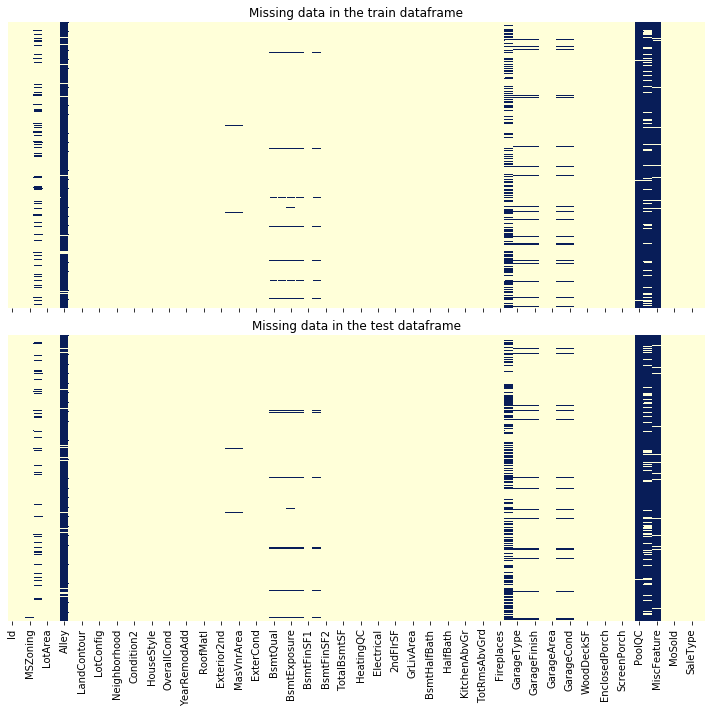

In [9]:
#Set the default subplots number of rows,number of columns and figure size,:
fig, ax = plt.subplots(nrows = 2, ncols = 1, figsize = (10, 10),  sharex=True)

# train data 
sns.heatmap(df_train_data_out.isnull(), yticklabels=False, ax = ax[0],cbar=False, cmap='YlGnBu')
# Set the heatmap title
ax[0].set_title('Missing data in the train dataframe')

# test data
sns.heatmap(df_test_data.isnull(), yticklabels=False, ax = ax[1], cbar=False, cmap='YlGnBu')
# Set the heatmap title
ax[1].set_title('Missing data in the test dataframe');
plt.tight_layout()

# Let's investigate some of the categorical columns

In [10]:
print('MSZoning: ', df_train_data_out['MSZoning'].unique())
print('\nMSSubClass: ', df_train_data_out['MSSubClass'].unique())
print('\nPoolQC: ', df_train_data_out['PoolQC'].unique())
print('\nUtilities: ', df_train_data_out['Utilities'].unique())

MSZoning:  ['RL' 'RM' 'C (all)' 'FV' 'RH']

MSSubClass:  [ 60  20  70  50 190  45  90 120  30  85  80 160  75 180  40]

PoolQC:  [nan 'Ex' 'Fa' 'Gd']

Utilities:  ['AllPub' 'NoSeWa']


In [11]:
print('MSZoning: ', df_test_data['MSZoning'].unique())
print('\nMSSubClass: ', df_test_data['MSSubClass'].unique())
print('\nPoolQC: ', df_test_data['PoolQC'].unique())
print('\nUtilities: ', df_test_data['Utilities'].unique())

MSZoning:  ['RH' 'RL' 'RM' 'FV' 'C (all)' nan]

MSSubClass:  [ 20  60 120 160  80  30  50  90  85 190  45  70  75 180  40 150]

PoolQC:  [nan 'Ex' 'Gd']

Utilities:  ['AllPub' nan]


- After looking at the data descriptions, we noticed the following:
    - Some columns in the Train DF contain Certain categories, while the Test DF contain a different set of categories 
    - We also noticed that NaN values in some columns represent NA category, while in other it was simply missing data
    - As a result, these columns will have to be filled appropriately based on what is provided in the data description

# Before we start filling columns, we would like to look at the data for outliers

- We will start by looking at the columns with the highest correlation with our Traget, in this case the SalePrice

In [12]:
#Correlation with output variable
df_corr = df_train_data_out.corr()
cor_target = abs(df_corr["SalePrice"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.4]
relevant_features

OverallQual     0.790982
YearBuilt       0.522897
YearRemodAdd    0.507101
MasVnrArea      0.477493
TotalBsmtSF     0.613581
1stFlrSF        0.605852
GrLivArea       0.708624
FullBath        0.560664
TotRmsAbvGrd    0.533723
Fireplaces      0.466929
GarageYrBlt     0.486362
GarageCars      0.640409
GarageArea      0.623431
SalePrice       1.000000
Name: SalePrice, dtype: float64

- We will plot using SNS pairplot to check for any noticable outliers

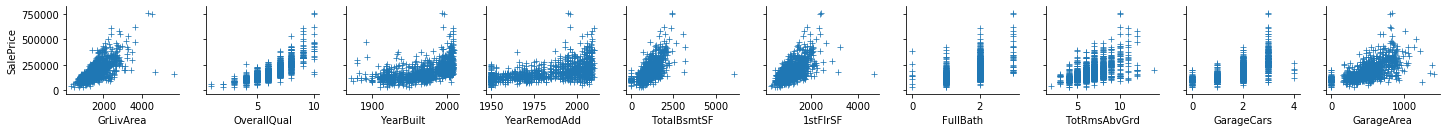

In [13]:
# Plotting the best correlated features with SalePrice using pair plot
sns.pairplot(df_train_data_out,height=2, x_vars=['GrLivArea',
                                             'OverallQual',
                                             'YearBuilt',
                                             'YearRemodAdd',
                                             'TotalBsmtSF',
                                             '1stFlrSF',
                                             'FullBath',
                                             'TotRmsAbvGrd',
                                             'GarageCars',
                                             'GarageArea'], y_vars='SalePrice', markers=['+'])

- From the pairplots we noticed that there are outlier points for the features (GrLivArea, TotalBsmtSF and 1stFlrSF)

# Relation exploration for some features

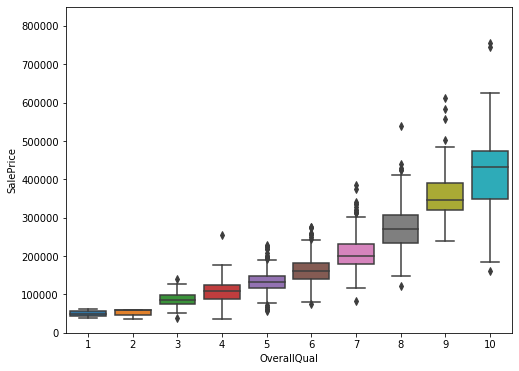

In [14]:
#box plot overallqual/saleprice
data = pd.concat([df_train_data_out['SalePrice'], df_train_data_out['OverallQual']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='OverallQual', y='SalePrice', data=data)
fig.axis(ymin=0, ymax=850000);

- The Overall quality for the house positively correlates with the house price, as the quality increase the price of the house increases

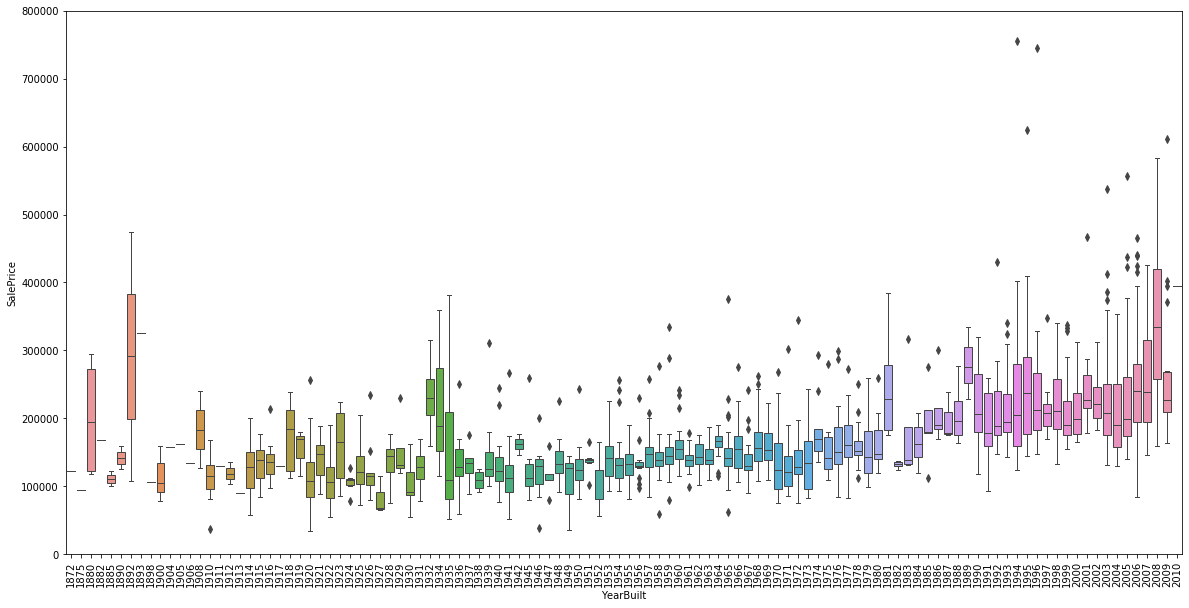

In [15]:
#box plot YearBuilt/saleprice
data = pd.concat([df_train_data_out['SalePrice'], df_train_data_out['YearBuilt']], axis=1)
fig, ax = plt.subplots(figsize=(20, 10))
fig = sns.boxplot(x='YearBuilt', y='SalePrice', data=data, linewidth=1)
plt.xticks(rotation=90);
fig.axis(ymin=0, ymax=800000);

### so we try to see the price and the year to check the outlier and how the prise go with the year 

# Let's drop the outliers for GRLivArea based on SalePrice

In [16]:
# Dropping outliers from train DF for column GrLivArea
df_train_data = df_train_data_out.drop(df_train_data_out[(df_train_data_out['GrLivArea']>4000) & 
                                        (df_train_data_out['SalePrice']<300000)].index)

df_train_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


- By looking at the GRLiveArea, we can see that noticable outliers are now gone

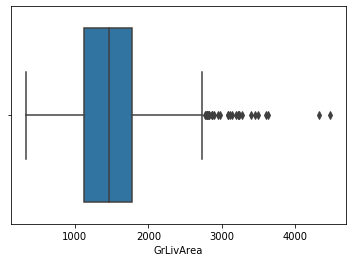

In [17]:
gr=sns.boxplot(x=df_train_data['GrLivArea'])

# Now we will split our train data to X & y (target)

In [18]:
# Getting the SalePrice in a target column
y = df_train_data['SalePrice']

In [19]:
# Dropping SalePrice from train DF(
df_train_data.drop('SalePrice',axis=1 ,inplace= True)

# Now we will merger the train & test DFs

In [20]:
# Merging both train and test DF and preparing for data cleaning 
data_merge = pd.merge(df_train_data ,df_test_data,how='outer',left_index=False, right_index=False)

In [21]:
# Checking that the merge done appropriately 
data_merge.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


# We are almost there, now we will fill our NaN values accordingly 

- Categorical columns with actual missing values will be filled with the mode of the column
- Numerical columns with numbers that are not; for example, years, will ne filled with the median of the column
- Lastly, The reset of the columns with NaN and are legitimate NA categories will be filled with NA

In [22]:
# Replace NaNs with 0 for garage year built
data_merge['GarageYrBlt'].fillna(0, inplace=True)

# For garages with no built year, assume that it was built in the same year as the house 
fixed_garage = [j if i == 0 else i for i,j in zip(data_merge['GarageYrBlt'], data_merge['YearBuilt'])]
    
# Assigne new replaced zero values to the garage year built
data_merge['GarageYrBlt'] = fixed_garage

In [23]:
# Getting the columns that should be filled using the most common category in the column
col_mode_fill = ['MSZoning', 'Utilities', 'Exterior1st', 'MasVnrType', 'BsmtQual', 'KitchenQual', 
                 'Functional', 'Electrical']
# Filling the category columns with the mode of the column
data_merge.update(data_merge[col_mode_fill].fillna(df_train_data[col_mode_fill].mode(), inplace=True))
data_merge[col_mode_fill].head(100)

/Users/ghalib/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4244: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  **kwargs


,MSZoning,Utilities,Exterior1st,MasVnrType,BsmtQual,KitchenQual,Functional,Electrical
0,RL,AllPub,VinylSd,BrkFace,Gd,Gd,Typ,SBrkr
1,RL,AllPub,MetalSd,None,Gd,TA,Typ,SBrkr
2,RL,AllPub,VinylSd,BrkFace,Gd,Gd,Typ,SBrkr
3,RL,AllPub,Wd Sdng,None,TA,Gd,Typ,SBrkr
4,RL,AllPub,VinylSd,BrkFace,Gd,Gd,Typ,SBrkr
...,...,...,...,...,...,...,...,...
95,RL,AllPub,VinylSd,BrkFace,Gd,TA,Typ,SBrkr
96,RL,AllPub,VinylSd,BrkFace,Gd,Gd,Typ,SBrkr
97,RL,AllPub,HdBoard,BrkFace,TA,TA,Typ,FuseF
98,RL,AllPub,Wd Sdng,None,TA,TA,Typ,SBrkr


In [24]:
# Fill NaN values with NA for object columns that were not filled with mode,
# and fill floats with medain
data_merge = data_merge.apply(lambda x: x.fillna('NA') if x.dtype.kind in 'O' else x.fillna(x[:1457].median()) 
                               if x.dtype.kind in 'f' else x)
data_merge.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,NA,Reg,Lvl,AllPub,...,0,0,NA,NA,NA,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,NA,Reg,Lvl,AllPub,...,0,0,NA,NA,NA,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,NA,IR1,Lvl,AllPub,...,0,0,NA,NA,NA,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,NA,IR1,Lvl,AllPub,...,0,0,NA,NA,NA,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,NA,IR1,Lvl,AllPub,...,0,0,NA,NA,NA,0,12,2008,WD,Normal


- Check our data after filling and make sure there are now missing data

In [25]:
# Display train info to check that data does not have any more NaN values
print_nan_percentage(data_merge)

,nan_count,nan_percentage
SaleCondition,0.0,0.0
SaleType,0.0,0.0
RoofStyle,0.0,0.0
RoofMatl,0.0,0.0
Exterior1st,0.0,0.0
Exterior2nd,0.0,0.0
MasVnrType,0.0,0.0
MasVnrArea,0.0,0.0
ExterQual,0.0,0.0
ExterCond,0.0,0.0


# HeatMap After Cleaning Data

- Using the same heatmap above for NaNs, we can see that all NaN values are now gone

Text(0.5, 1, 'Missing data in merged dataframe')

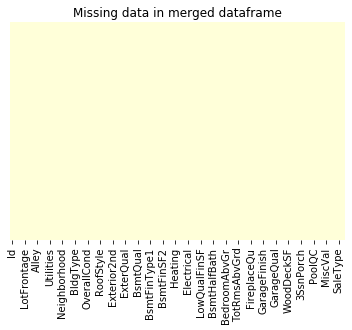

In [26]:
# Creating a heatmap for Merged Data 
sns.heatmap(data_merge.isnull(), yticklabels=False,cbar=False, cmap='YlGnBu')
# Set the heatmap title
plt.title('Missing data in merged dataframe')


# Skewness of features

- Seting index to be ID so it does not get changed in the process of Box Cox

In [27]:
data_merge.set_index("Id", inplace=True)

In [28]:
# Import skew to calculate the skew of the functions and BoxCox for transformation
from scipy.stats import skew
from scipy.special import boxcox1p

# Get numerical columns from DF
numeric_feats = data_merge.dtypes[data_merge.dtypes != "object"].index

# Check the skew of all numerical features
skewed_cols = data_merge[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
skewness = pd.DataFrame({'Skew' :skewed_cols})
skewness.head(10)

,Skew
MiscVal,21.939672
PoolArea,17.688664
LotArea,13.109495
LowQualFinSF,12.084539
3SsnPorch,11.372080
KitchenAbvGr,4.300550
BsmtFinSF2,4.144503
EnclosedPorch,4.002344
ScreenPorch,3.945101
BsmtHalfBath,3.929996


In [29]:
# Check how many columns are skewed based on previous scores 
skewness = skewness[abs(skewness) > 0.75]
print("There are ", skewness.shape[0], " skewed numerical features to Box Cox transform")

There are  36  skewed numerical features to Box Cox transform


In [30]:
# Get the index of skewed features
skewed_features = skewness.index

lam = 0.15
for feat in skewed_features:
    data_merge[feat] = boxcox1p(data_merge[feat], lam)

# In this step we will convert our data to dummy variables

- This step is done to convert categorical columns to numerical ones, which will be needed in performing training on our models and preducing predictions for the test data in the last step  
- We will do this step with the merged data becasue some categories in the test DF are not in the train DF and vice versa
- As a result, we might have a mismatch in shapes if this step was done seperatly for the two DFs\

In [31]:
# Convert categorical variable into dummy/indicator variables.
dt_me_dumy = pd.get_dummies(data_merge, drop_first=True)

In [32]:
dt_me_dumy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2917 entries, 1 to 2919
Columns: 267 entries, MSSubClass to SaleCondition_Partial
dtypes: float64(36), uint8(231)
memory usage: 1.5 MB


- We will split the DF based on ID for Train 

In [33]:
train_cleaned = dt_me_dumy[:1458]

In [34]:
train_cleaned.tail()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_NA,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
1456,5.684507,5.744420,18.960528,2.259674,2.055642,14.181278,14.182841,0.000000,0.000000,0.000000,...,0,0,0,0,1,0,0,0,1,0
1457,3.858807,6.337529,20.994868,2.259674,2.259674,14.148295,14.164038,7.003881,11.473247,7.659675,...,0,0,0,0,1,0,0,0,1,0
1458,5.968981,5.859551,19.476345,2.440268,2.750250,14.089451,14.192207,0.000000,8.823108,0.000000,...,0,0,0,0,1,0,0,0,1,0
1459,3.858807,5.914940,19.760176,2.055642,2.259674,14.103852,14.176584,0.000000,5.321541,12.206046,...,0,0,0,0,1,0,0,0,1,0
1460,3.858807,6.098626,19.849063,2.055642,2.259674,14.127727,14.127727,0.000000,11.607976,8.946561,...,0,0,0,0,1,0,0,0,1,0


- We will split the DF based on ID for Test 

In [35]:
test_cleand = dt_me_dumy[1458:]

In [36]:
test_cleand.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_NA,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
1461,3.858807,6.221214,20.479373,2.055642,2.259674,14.121376,14.121376,0.000000,10.105326,7.397498,...,0,0,0,0,1,0,0,0,1,0
1462,3.858807,6.244956,21.327220,2.259674,2.259674,14.116605,14.116605,6.808145,11.901094,0.000000,...,0,0,0,0,1,0,0,0,1,0
1463,5.684507,6.073289,21.196905,2.055642,2.055642,14.178149,14.179714,0.000000,11.476685,0.000000,...,0,0,0,0,1,0,0,0,1,0
1464,5.684507,6.172972,19.865444,2.259674,2.259674,14.179714,14.179714,3.858807,10.749651,0.000000,...,0,0,0,0,1,0,0,0,1,0
1465,7.020909,5.093857,17.257255,2.602594,2.055642,14.170316,14.170316,0.000000,8.720170,0.000000,...,0,0,0,0,1,0,0,0,1,0


# Finally, the last step before modeling and getting predictions

- In this step we will standardize the data for use in Lasso and Ridge regression

In [37]:
# initialize the Scaler
ss = StandardScaler()

# Fit train data using the scaler (scale the data)
train_cleaned_s = ss.fit_transform(train_cleaned)

test_cleand_s = ss.transform(test_cleand)

In [38]:
# Display standardized data (train)
train_cleaned_s

array([[ 0.37548564, -0.09959528, -0.16639215, ..., -0.11793306,
         0.46586305, -0.3035372 ],
       [-1.09413032,  0.57887788,  0.08035994, ..., -0.11793306,
         0.46586305, -0.3035372 ],
       [ 0.37548564,  0.04590526,  0.39373885, ..., -0.11793306,
         0.46586305, -0.3035372 ],
       ...,
       [ 0.60447585, -0.0504815 , -0.0360325 , ..., -0.11793306,
         0.46586305, -0.3035372 ],
       [-1.09413032,  0.04590526,  0.10403276, ..., -0.11793306,
         0.46586305, -0.3035372 ],
       [-1.09413032,  0.36555295,  0.14789723, ..., -0.11793306,
         0.46586305, -0.3035372 ]])

In [39]:
# Display standardized data (test)
test_cleand_s

array([[-1.09413032,  0.57887788,  0.45894358, ..., -0.11793306,
         0.46586305, -0.3035372 ],
       [-1.09413032,  0.62019363,  0.87734111, ..., -0.11793306,
         0.46586305, -0.3035372 ],
       [ 0.37548564,  0.32146242,  0.81303258, ..., -0.11793306,
         0.46586305, -0.3035372 ],
       ...,
       [-1.09413032,  3.01312229,  1.5952775 , ..., -0.11793306,
        -2.14655359, -0.3035372 ],
       [ 0.901143  , -0.25083031,  0.24535657, ..., -0.11793306,
         0.46586305, -0.3035372 ],
       [ 0.37548564,  0.32146242,  0.08584458, ..., -0.11793306,
         0.46586305, -0.3035372 ]])

# Modeling Section

In [40]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression, RidgeCV, LassoCV, ElasticNetCV

# Y-target analysis

We will start by looking at the distribution of the y values (target values)

- We can see the the target variable is not normally distributed

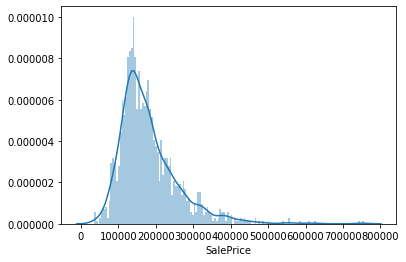

In [41]:
sns.distplot(y, norm_hist=True, bins=146)

We can see that the distribution is right skewed, so let's try and fix it by performing log on the values of y

- Log transformation will help shape our target to become normally distributed and fit our data better

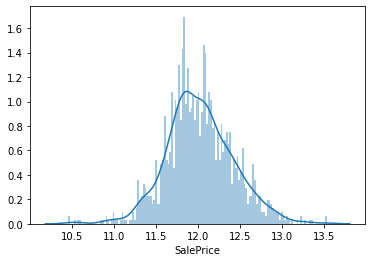

In [42]:
ylog = y.copy()
ylog = np.log(ylog)
sns.distplot(ylog, norm_hist=True, bins=146)

# Creating Functions to help with modeling and reducing the number of lines being added to the file

In [43]:
# A function that takes a model name, its scores, the train score and prints them
def print_model_mean_and_train(model, scores, train_scores):
    print(model, " mean score is:", scores.mean())
    print('Train score for ', model,' is: ', train_scores)

In [44]:
# a function that takes the predictions of the model, the model name and save ot to a CSV
# The function will return the first 10 predictions
def save_csv(predictions, model_name):
    # Reverse log operation on predictions using exp
    submission['SalePrice'] = np.exp(predictions)
    # Save CSV to path
    submission.to_csv('data/submission_'+model_name+'.csv', index=False)
    return submission.head(10)

In [45]:
# A function that takes the model, X & y train, cv number, and performs cross validation
# The function will return the model and its scores
def performe_CV(used_model, X, y_data, cv):
    used_model.fit(X, y_data)
    scores = cross_val_score(used_model, X, y_data, cv=cv)
    return used_model, scores

# Lasso vs. LassoCV

We will start by performing Lasso regression and after that we will select the best features based on what Lasso decides

In [46]:
from sklearn.feature_selection import SelectFromModel

We will performe Lasso and LassoCV for comparison

- LassoCV

In [47]:
# Build LassoCV regression model 

# Fit on standarized data and performe 8-fold CV
lassoCV, lassoCV_scores = performe_CV(LassoCV(), train_cleaned_s, ylog, 8)

# Print Model Mean Score
print_model_mean_and_train('LassoCV', lassoCV_scores, lassoCV.score(train_cleaned_s, ylog))

# Get best alpha
bestAlphaLasso = lassoCV.alpha_
print("Best Alpha for LassoCV: ", bestAlphaLasso)

/Users/ghalib/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/ghalib/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/ghalib/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/ghalib/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to s

LassoCV  mean score is: 0.9171211083636541
Train score for  LassoCV  is:  0.936192037697004
Best Alpha for LassoCV:  0.0024449158890331264


- Lasso

In [48]:
# Build Lasoo regression model using best alpha
lasso = Lasso(alpha=bestAlphaLasso, copy_X=True,
                             fit_intercept=True, max_iter=1000, normalize=False,
                             positive=False, precompute=False,
                             random_state=None, selection='cyclic', tol=0.0001,
                             warm_start=False)
   
# Fit on standarized data and performe 8-fold CV
lasso, lasso_scores = performe_CV(lasso, train_cleaned_s, ylog, 8)
# Print Model Mean Score
print_model_mean_and_train('Lasso', lasso_scores, lasso.score(train_cleaned_s, ylog))

Lasso  mean score is: 0.9172184670540717
Train score for  Lasso  is:  0.936192037697004


- Print predictions based on the model with the highest mean it this case it was Lasso

In [49]:
# Give the model data that it have not seen yet and get the predictions
pred_lasso = lasso.predict(test_cleand_s)
pred_lasso

array([11.6538282 , 11.96399331, 12.13184506, ..., 12.02994213,
       11.70410096, 12.2992354 ])

- Save predictions to CSV file

In [50]:
save_csv(pred_lasso, 'Lasso')

,Id,SalePrice
0,1461,115131.265580
1,1462,156998.778883
2,1463,185692.073610
3,1464,198872.330753
4,1465,201638.877046
5,1466,172481.546226
6,1467,179939.252959
7,1468,162649.456437
8,1469,205187.789319
9,1470,115220.116676


- Now we want to get the best features from Lasso or LassoCV

In [51]:
sfm = SelectFromModel(lasso, threshold=0.1)
sfm.fit(train_cleaned_s, ylog)
features = sfm.transform(train_cleaned_s)
feature_idx = sfm.get_support()
feature_name = train_cleaned.columns
#feature_name = feature_name.drop('Id')
feature_name

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       ...
       'SaleType_ConLw', 'SaleType_NA', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=267)

In [52]:
# Get a copy of the best features and standardize it 
best_train = train_cleaned

# Dropping multicollinearity columns
best_train.drop('1stFlrSF', axis=1, inplace=True)
best_train.drop('TotRmsAbvGrd', axis=1, inplace=True)                                             
best_train.drop('GarageArea', axis=1, inplace=True)                                             
best_train

/Users/ghalib/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_NA,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
1,5.684507,5.831328,19.212182,2.440268,2.055642,14.187527,14.187527,8.059126,11.170327,0.000000,...,0,0,0,0,1,0,0,0,1,0
2,3.858807,6.221214,19.712205,2.259674,2.602594,14.145138,14.145138,0.000000,12.062832,0.000000,...,0,0,0,0,1,0,0,0,1,0
3,5.684507,5.914940,20.347241,2.440268,2.055642,14.184404,14.185966,7.646538,10.200343,0.000000,...,0,0,0,0,1,0,0,0,1,0
4,5.968981,5.684507,19.691553,2.440268,2.055642,14.047529,14.135652,0.000000,8.274266,0.000000,...,0,0,0,0,1,0,0,0,0,0
5,5.684507,6.314735,21.325160,2.602594,2.055642,14.182841,14.182841,9.391827,10.971129,0.000000,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,5.684507,5.744420,18.960528,2.259674,2.055642,14.181278,14.182841,0.000000,0.000000,0.000000,...,0,0,0,0,1,0,0,0,1,0
1457,3.858807,6.337529,20.994868,2.259674,2.259674,14.148295,14.164038,7.003881,11.473247,7.659675,...,0,0,0,0,1,0,0,0,1,0
1458,5.968981,5.859551,19.476345,2.440268,2.750250,14.089451,14.192207,0.000000,8.823108,0.000000,...,0,0,0,0,1,0,0,0,1,0


In [53]:
# Get a copy of the best features and standardize it 
best_test = test_cleand

# Dropping multicollinearity columns
best_test.drop('1stFlrSF', axis=1, inplace=True)
best_test.drop('TotRmsAbvGrd', axis=1, inplace=True)                                             
best_test.drop('GarageArea', axis=1, inplace=True)   

In [54]:
# Fit train data using the scaler (scale the data)
best_train_s = ss.fit_transform(best_train)
best_test_s = ss.transform(best_test)

# From now on we will only use the best features that lasso or lassoCV decided on 

# Linear Regression 

In [55]:
from sklearn.model_selection import cross_val_score

In [56]:
# Create model instance
lm = LinearRegression()
     
# Perform 10-fold cross validation and fit on model
lm, lm_scores = performe_CV(lm,  best_train, ylog, 10)
print_model_mean_and_train('Linear Regression', lm_scores, lm.score(best_train, ylog))


Linear Regression  mean score is: 0.9040194047858243
Train score for  Linear Regression  is:  0.9497812227607868


In [57]:
# Give the model data that it have not seen yet and get the predictions
pred_lm = lm.predict(best_test)
pred_lm

array([11.67632939, 12.02601664, 12.15771016, ..., 12.10086202,
       11.70714185, 12.27837325])

In [58]:
save_csv(pred_lm, 'LinearReg')

,Id,SalePrice
0,1461,117751.221453
1,1462,167044.686413
2,1463,190557.670476
3,1464,201511.816712
4,1465,195944.963775
5,1466,171377.997832
6,1467,174549.279945
7,1468,159823.525894
8,1469,201921.234535
9,1470,119142.465318


# Ridge vs. RidgeCV

We will performe Ridge and RidgeCV for comparison

- RidgeCV

In [59]:
# np.logspace gives us points between specified orders of magnitude on a logarithmic scale. It is base 10.
r_alphas = np.logspace(0, 5, 500)

In [60]:
# Build RidgeCV regression model 

# Perform 8-fold cross validation and fit on model
ridgeCV, ridgeCV_scores = performe_CV(RidgeCV(alphas=r_alphas), best_train, ylog, 8)
print_model_mean_and_train('RidgeCV', ridgeCV_scores, ridgeCV.score(best_train, ylog))        

# Get best alpha 
bestAlpha = ridgeCV.alpha_
print("Best Alpha for RidgeCV: ", bestAlpha)

RidgeCV  mean score is: 0.919265484578703
Train score for  RidgeCV  is:  0.940541419038156
Best Alpha for RidgeCV:  6.188468238624386


- Ridge

In [61]:
# Build Ridge regression model using best alpha
ridge = Ridge(alpha=bestAlpha, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=1, solver='auto', tol=0.001)

# Perform 8-fold cross validation and fit on model
ridge_model, ridge_scores = performe_CV(ridge, best_train, ylog, 8)
print_model_mean_and_train('Ridge', ridge_scores, ridge_model.score(best_train, ylog))

Ridge  mean score is: 0.9195632037461001
Train score for  Ridge  is:  0.9405414190381578


- Print predictions based on the model with the highest mean

In [62]:
# Give the model data that it have not seen yet and get the predictions
pred_ridge = ridge_model.predict(best_test)
pred_ridge

array([11.6604299 , 11.9936216 , 12.1458392 , ..., 12.07382532,
       11.656091  , 12.27093588])

- Save predictions to CSV file

In [63]:
save_csv(pred_ridge, 'Ridge')

,Id,SalePrice
0,1461,115893.842197
1,1462,161719.979324
2,1463,188308.941716
3,1464,198836.771905
4,1465,196860.990124
5,1466,170691.958534
6,1467,172691.726230
7,1468,158182.829797
8,1469,202659.346718
9,1470,119604.867491


- Use distplot to compare all the outputs of the predictions shown by the models to find the best prediction comparing with ylog.  
- We notice that all there models approximately produce similiar predictions

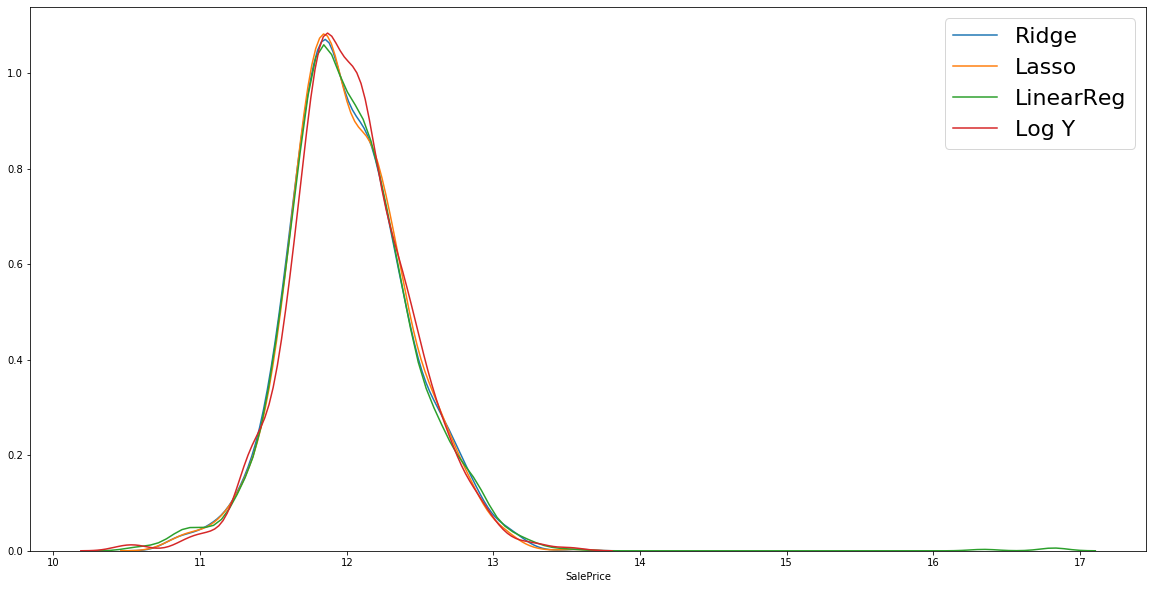

In [64]:
# Creating multiple distplots to compare the predictions with the target data
plt.figure(figsize=(20,10))
sns.distplot(pred_ridge, label='Ridge', hist=False)
sns.distplot(pred_lasso, label='Lasso', hist=False)
sns.distplot(pred_lm, label='LinearReg', hist=False)
sns.distplot(ylog, label='Log Y', hist=False)
plt.legend(fontsize='22')

# ElasticNet

- This model did not perform as good as the rest of the models and we are leaving it here as a point of reference

In [65]:
# Creating l1_ratio points to try and get optimal ratio 
l1_ratios = np.linspace(0.01, 1.0, 5)

# Build ElasticNetCV regression model
elasticCV = ElasticNetCV(l1_ratio=[.1, .5, .7,
    .9, .95, .99, 1], n_alphas=600)

# Perform 8-fold cross validation and fit on model
elasticCV, elasticCV_scores = performe_CV(elasticCV, best_train_s, ylog, 8)
print_model_mean_and_train('ElasticNetCV', elasticCV_scores, elasticCV.score(best_train_s, ylog))


# Getting best alpha and optimal ratio
bestAlphaElastic = elasticCV.alpha_
optimall1 = elasticCV.l1_ratio_

print("Best Alpha for ElasticNetCV: ", bestAlphaElastic)
print("Optimal l1_ratio for ElasticNetCV: ", optimall1)

/Users/ghalib/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/ghalib/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/ghalib/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/ghalib/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to s

ElasticNetCV  mean score is: 0.9173329654944868
Train score for  ElasticNetCV  is:  0.9373616339137423
Best Alpha for ElasticNetCV:  0.004435065414624018
Optimal l1_ratio for ElasticNetCV:  0.5


In [66]:
# Build ElasticNet regression model
elasticNet = ElasticNet(alpha=bestAlphaElastic, l1_ratio=optimall1, random_state=1)

# Perform 8-fold cross validation and fit on model
elastic, elastic_scores = performe_CV(elasticNet, best_train_s, ylog, 8)
print_model_mean_and_train('ElasticNet', elastic_scores, elastic.score(best_train_s, ylog))

ElasticNet  mean score is: 0.9172712439949702
Train score for  ElasticNet  is:  0.9373616339137423


In [67]:
# Give the model data that it have not seen yet and get the predictions
pred_elastic = elastic.predict(best_test_s)
pred_elastic

array([11.65530088, 11.95228134, 12.1302477 , ..., 12.03280625,
       11.69459739, 12.30691758])

- Save predictions to CSV file

In [68]:
save_csv(pred_elastic, 'elastic')

,Id,SalePrice
0,1461,115300.942223
1,1462,155170.739792
2,1463,185395.692018
3,1464,197788.119612
4,1465,199415.461911
5,1466,174177.584209
6,1467,178120.813323
7,1468,162748.618420
8,1469,202770.792437
9,1470,116402.416935


# Grid Search

In [69]:
from sklearn.model_selection import GridSearchCV

In [70]:
# Build a GS regression model 

# Creating a list of alphas for Ridge
alphas = np.logspace(-4, -0.5, 30)

# Setting the parameters for Ridge Grid Search
tuned_parameters = {'alpha': alphas,
                    'fit_intercept': [True,False], 
                    'normalize' :[False, True]}

# Performing GS CV 
gs = GridSearchCV(ridge, param_grid=tuned_parameters, cv=5)

# Fitting the model 
gs.fit(best_train_s, ylog)

# Printing the score 
print("Grid Search Train Score is: ",gs.score(best_train_s, ylog))

Grid Search Train Score is:  0.9497108238213601


/Users/ghalib/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [71]:
# Give the model data that it have not seen yet and get the predictions
gs_pred = gs.predict(best_test_s)
gs_pred

array([11.67709655, 12.02320302, 12.15795745, ..., 12.09854373,
       11.70527816, 12.27767277])

In [72]:
# Getting the best estimator from the model 
best = gs.best_estimator_
best

Ridge(alpha=0.31622776601683794, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=1, solver='auto', tol=0.001)

In [73]:
# Getting the best Parameters from the model 
gs.best_params_

{'alpha': 0.31622776601683794, 'fit_intercept': True, 'normalize': False}

- Save predictions to CSV file

In [74]:
save_csv(gs_pred, 'grid')

,Id,SalePrice
0,1461,117841.591108
1,1462,166575.346073
2,1463,190604.800226
3,1464,201385.454972
4,1465,195919.674065
5,1466,171333.053103
6,1467,174404.663489
7,1468,159765.123513
8,1469,200516.602111
9,1470,118947.440066


# Random Forest

- Finally we are doing one last test on Random Forest
- The scores for this were the worst between them all

In [75]:
from sklearn.ensemble import RandomForestRegressor

In [76]:
# Building RF model
rf = RandomForestRegressor()

# Perform 7-fold cross validation and fit on model
rf, rf_score = performe_CV(rf, best_train_s, ylog, 7)
print_model_mean_and_train('RF', rf_score, rf.score(best_train_s, ylog))

/Users/ghalib/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RF  mean score is: 0.8666217586504125
Train score for  RF  is:  0.9752243849536647


In [77]:
# Give the model data that it have not seen yet and get the predictions
pred_rf = rf.predict(best_test_s)
pred_rf

array([11.75751412, 11.95650314, 12.06171371, ..., 11.91420489,
       11.75526284, 12.41434294])

In [78]:
save_csv(pred_rf, 'RF')

,Id,SalePrice
0,1461,127709.587971
1,1462,155827.225487
2,1463,173115.401508
3,1464,178794.682482
4,1465,194690.029993
5,1466,178191.244331
6,1467,167819.464900
7,1468,172261.116550
8,1469,178888.418819
9,1470,117784.050410


# Conclusion

- Our model took into consideration the data, the statistics and the regression models.
- We made sure when cleaning the data that they are categorized poperly and that missing values where filled acoordingly. 
- After we took a look from a statistical point of view where we identified outliers, looked at column skewness and performed necessary data transformation to get a better fit.
- Next we took the data and transofrmed it to dummy data to make sure we have all the categorical columns into consideration.
- Then we split the data again before standardizing and fit/transformed our train data while only transforming the test data.
- Before we start performing regression, we looked in the target variable and noticed that the data were also not normally distributed, we decided to perform log transformation that helps with transforming data from skewed to look more like a normal distribution.
- We attempted to select best features using the selectFromModel function but we kept getting all the columns.
- After that we performed multiple regression models on the data and figured that Ridge/RidgeCV were the best models when producing results.
- Finally, our Kaggle score was 0.11872